In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

0.9216741402242491 0.3879649201176457 0.39842253847270903


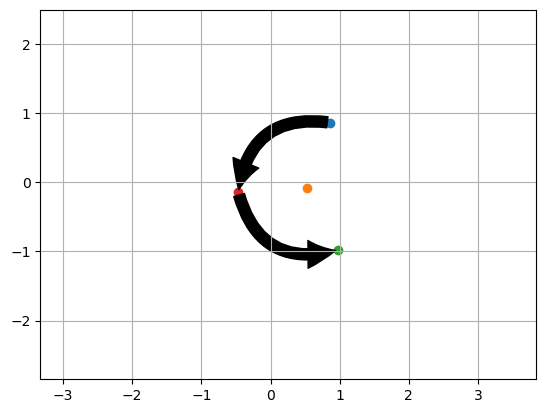

In [7]:
start = np.array([0.8610557426251217, 0.861055742625122]) # INPUT  coordinate 1
end = np.array([0.9785445567824274, -0.9785445567824272]) # INPUT  coordinate 3
radius = 1 # INPUT

def SemiCirc_coordinates(start, end, r=None):
    half_StartEnd = (np.linalg.norm(start-end)/2) #calculate half length of start to end
    if r==None or r < half_StartEnd: # if the radius desired is smaller than the half_StartEnd, reset radius to half_StartEnd
        r=half_StartEnd
    a = np.sqrt(abs(half_StartEnd**2 - r**2)) # calculate the length of the midpoint to point halfway on circle
    alpha = np.arctan(a/half_StartEnd)
    print(half_StartEnd, a, alpha)
    end_2start = np.arctan2(*end-start)
    B_2origin = alpha + end_2start
    B = r*np.sin(B_2origin)+start[0],r*np.cos(B_2origin)+start[1]
    
    arc_of_arrow = np.pi-(np.pi-alpha*2)/2 # radians
    startD = (r * np.sin(arc_of_arrow/2))*2 #length
    rad_BstartD = (np.pi-arc_of_arrow)/2#
    radstartB_toX = np.arctan2(*B-start)
    rad_startD = rad_BstartD+radstartB_toX
    D = startD*np.sin(rad_startD)+start[0],startD*np.cos(rad_startD)+start[1] # coordinate 2

    return (start, B, end, D)

(A, B, C, D) = SemiCirc_coordinates(start, end, radius)
fig, ax = plt.subplots()
ax.scatter(A[0],A[1])
ax.scatter(B[0],B[1])
ax.scatter(C[0],C[1])
ax.scatter(D[0],D[1])
arrow = FancyArrowPatch(posA=A, posB=D, connectionstyle="arc3,rad=0.5", arrowstyle="simple", mutation_scale= 40, color="k")
# Add the arrow patch to the axis
ax.add_patch(arrow)
arrow1 = FancyArrowPatch(posA=D, posB=C, connectionstyle="arc3,rad=0.5", arrowstyle="simple", mutation_scale= 40, color="k")
# Add the arrow patch to the axis
ax.add_patch(arrow1)
plt.axis('equal')
plt.grid()
plt.show()

In [146]:
for i in [rad_AD, rad_BAD, radAB_toX, arc_of_arrow/2, np.arctan2(*B-A)]:
    print(np.rad2deg(i))

13.942783418046869
10.352405527317709
24.29518894536458
79.64759447268229
24.29518894536458


In [154]:
np.arctan2(*B-A)

0.4240310394907406

In [164]:
np.arctan2(*A-B)

-2.717561614099053

In [ ]:
### OLD TRANSITION PLOT
fig_w = fig.get_size_inches()[0]
arrowsize = [w*40 for w in weights]
labels = dict(zip(range(len(G)),  [clu_group_label[k] for k in cluster_label if k != -1]))
label_collection = nx.draw_networkx_labels(G, pos=nx.circular_layout(G), ax=ax, labels=labels)

cluster_alpha = ((summary['duration_mean']*summary['duration_count'])/len(y_ps)).reindex([k for k in cluster_label if k != -1]).fillna(0)
color_map = [cluster_color[k] for k in cluster_color if k != -1]

edge_color = [cluster_color[c] for c in arr_out]
edge_alpha = [cluster_alpha[c] for c in arr_out]

node_collection = nx.draw_networkx_nodes(G, pos=nx.circular_layout(G), ax=ax, node_color = color_map, node_size= 4000, margins=0.1,
                                         alpha= cluster_alpha,
                                         edgecolors=color_map)
edge_collection = nx.draw_networkx_edges(G, pos=nx.circular_layout(G), ax=ax, 
                                         arrowsize =arrowsize, connectionstyle="arc3,rad=.15", arrowstyle="simple", #alpha=edge_alpha,
                                         label=list(weights), node_size=4000, edge_color=edge_color)
node_collection.set_zorder(25)

for ed in edge_collection:
    ed.set_zorder(20)
    
edgelist = [(i,i) for i in np.unique(frame[~np.isnan(frame)])]
selfweights = {i:transition_self[i] for i in np.unique(frame[~np.isnan(frame)]).astype(int)}
G.add_edges_from(edgelist)

#selfweights = [0.2,1, 0.6, .8, 1, .5]
for ii, selfloop in zip(edgelist, selfweights):
    i = ii[0].astype(int)
    offset_x, offset_y = nx.circular_layout(G)[i][0]+nx.circular_layout(G)[i][0]/3,nx.circular_layout(G)[i][1]+nx.circular_layout(G)[i][1]/3
    print(offset_x, offset_y)
    ring = mpatches.Wedge([offset_x, offset_y], 0.2, 
                          np.rad2deg(np.arctan2(offset_x, -offset_y))-210, np.rad2deg(np.arctan2(offset_x, -offset_y))+30,
                          width=selfweights[i]/15, zorder=0)
    #ring = ring.set_alpha(selfweights[i])
    #ring = FancyArrowPatch([offset_x, offset_y], (1.6, arr_s), mutation_scale=arr_s*fig_w*5, label = arr_s, color='k', alpha=0.5)
    p = PatchCollection([ring], edgecolor = color_map[i], facecolor = color_map[i],#alpha=selfweights[i]
                       )
    ax.add_collection(p)

#fig, ax = plt.subplots(1, figsize=(7,5))
for arr_s in np.linspace(0.2,1,5):
    arrow = FancyArrowPatch((1.6, arr_s), (1.9, arr_s), mutation_scale=arr_s*40, label = arr_s, color='k', alpha=0.5)
    ax.text(1.95, arr_s-0.03, f"{int(arr_s*100)}%")
    ax.add_patch(arrow)
ax.set_xlim(-2,2)
ax.set_ylim(-1.5,1.5)
ax.axis('off')
plt.savefig(os.path.join(out_predicted, '_'.join(fn.split('_')[:4]+['transitions.pdf'])))
plt.show()
